In [1]:
import geopandas as gpd


C:\Users\Anna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Loading bridge geo data

In [2]:
df_geo = gpd.read_file('../data/mosty_shp/mosty.shp')
df_geo_mp = gpd.read_file('../data/mosty_mp/mosty_mp/mosty_mp.shp')
crs = df_geo.crs;

In [3]:
df_geo.head(3)

,Elevation,Shape_Leng,Shape_Area,AKTUALIZAC,ID_MOST,geometry
0,352.404,30.274879,31.271576,None,650,"POLYGON Z ((-752364.129 -1038276.044 352.404, ..."
1,352.404,46.201840,50.956139,None,650,"POLYGON Z ((-752362.440 -1038278.096 352.404, ..."
2,352.404,53.635510,60.617815,None,650,"POLYGON Z ((-752344.137 -1038269.891 352.404, ..."


In [4]:
df_geo_mp.loc[df_geo_mp.ID_MOST == 650].head()

,ID_MOST,geometry
639,650,MULTIPOLYGON Z (((-752364.129 -1038276.044 352...


In [5]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80356 entries, 0 to 80355
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Elevation   80356 non-null  float64 
 1   Shape_Leng  80356 non-null  float64 
 2   Shape_Area  80356 non-null  float64 
 3   AKTUALIZAC  330 non-null    object  
 4   ID_MOST     80356 non-null  int64   
 5   geometry    80356 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
print("Unique bridge count:",len(df_geo.ID_MOST.unique()))
print("Unique bridge count:",len(df_geo_mp.ID_MOST.unique()))

Unique bridge count: 672
Unique bridge count: 672


### Joining geometries by bridge ID

Polygon    121
dtype: int64
414    False
dtype: bool


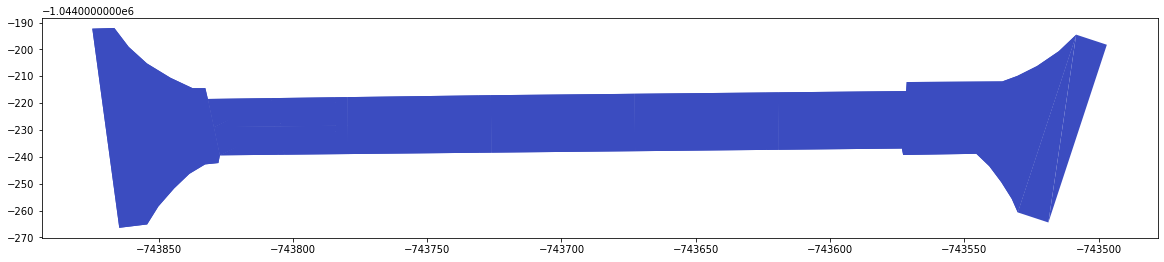

In [7]:
"""
Valid with multipylygon.buffer(0) but dissolve(by='') is better
"""


mosty_geo = df_geo.groupby('ID_MOST')

#extract only bridge geometry and ID
combined_geo = []
for most_id, most in mosty_geo:
    # combine geometry to multiplygon
    most_gdf = gpd.GeoDataFrame()
    most_gdf['geometry'] = df_geo_mp.loc[df_geo_mp.ID_MOST == most_id].geometry
    most_gdf['ID_MOST'] = [most_id]
    if most_id == 417:
        most_gdf.plot(figsize=(20,20), cmap='coolwarm')
        print(most.geom_type.value_counts())
        print(most_gdf.is_valid)

    combined_geo.append(most_gdf)

In [8]:
#extract only bridge geometry and ID
#dissolved = df_geo[["ID_MOST","geometry"]].dissolve(by='ID_MOST')
#print(dissolved.head(2))
#dissolved.plot()

#m = gpd.GeoDataFrame(dissolved.loc[[417,422],:])
#m.plot(figsize=(20,20))
#m.is_valid

In [9]:
import pandas as pd

In [10]:
df_geo = pd.concat(combined_geo)
df_geo.reset_index(drop=True,inplace=True)
df_geo = df_geo.set_crs(crs)

#df_geo = dissolved.reset_index()
#df_geo.head(10)
df_geo.to_file("../data/mosty_shp/mosty_unique.shp", driver="ESRI Shapefile", encoding="utf-8")

In [11]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  672 non-null    geometry
 1   ID_MOST   672 non-null    int64   
dtypes: geometry(1), int64(1)
memory usage: 10.6 KB


## Prepare metadata for linking - only magistrat bridges for now

In [12]:
df_meta = gpd.read_file('../data/mosty_shp/mosty_magistrat.shp')
df_meta = df_meta.set_crs(crs)

In [13]:
df_meta.head(2)

,Id,Jmeno,MistniNaze,ProhlidkaP,PosledniPr,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre,GPS_Lat,GPS_Lng,geometry
0,178b797b-a65e-493f-8be3-1b853d5f6d9b,Lávka na žel. most - jih,None,11.01.2022 Hlavní prohlídka,2022-01-11,V-025,3,III - Dobrý,Magistrát hlavního města Prahy,Praha 2,TSK PRAHA,"50,067","14,414",POINT (-743634.378 -1045196.960)
1,e0e4a06d-f98c-4ec6-8849-57d513adb27d,Palackého,None,14.01.2022 Hlavní prohlídka,2022-01-14,V-024,6,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 2,TSK PRAHA,"50,073","14,412",POINT (-743685.163 -1044516.347)


In [14]:
df_meta2 = gpd.read_file('../data/mosty_shp/mosty_CR_stav.shp')
df_meta2 = df_meta2.set_crs(crs)
df_meta2.head(2)
print(df_meta2.shape[0])
print(df_meta.shape[0])

19454
136


In [15]:
df_meta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          136 non-null    object  
 1   Jmeno       136 non-null    object  
 2   MistniNaze  9 non-null      object  
 3   ProhlidkaP  135 non-null    object  
 4   PosledniPr  135 non-null    object  
 5   Oznaceni    136 non-null    object  
 6   Stav        136 non-null    int64   
 7   PopisStavu  135 non-null    object  
 8   SpravaOrga  136 non-null    object  
 9   SpravaProv  108 non-null    object  
 10  SpravaStre  136 non-null    object  
 11  GPS_Lat     136 non-null    object  
 12  GPS_Lng     136 non-null    object  
 13  geometry    136 non-null    geometry
dtypes: geometry(1), int64(1), object(12)
memory usage: 15.0+ KB


## Execute spatial join on geometry and metadata geodataframes

In [22]:
df_merged = gpd.sjoin_nearest(df_geo, df_meta2, how='left', max_distance=50)

In [23]:
df_merged.encoding = 'utf-8'

In [24]:
df_merged.describe()

,ID_MOST,index_right,Unnamed_ 0,GPS_Lat,GPS_Lng,Stav
count,769.000000,529.000000,529.0,529.000000,529.000000,522.000000
mean,337.501951,9825.429112,0.0,14.445371,50.061726,3.766284
std,199.317763,5655.852967,0.0,0.083394,0.040651,1.288877
min,1.000000,116.000000,0.0,14.266596,49.947988,1.000000
25%,160.000000,4873.000000,0.0,14.393544,50.038857,3.000000
50%,334.000000,9743.000000,0.0,14.441316,50.061324,4.000000
75%,513.000000,14889.000000,0.0,14.501665,50.095684,5.000000
max,682.000000,19450.000000,0.0,14.666353,50.157237,7.000000


In [25]:
df_selection = df_merged[["geometry","ID_MOST","Jmeno","ProhlidkaP","Oznaceni","Stav","PopisStavu","SpravaOrga","SpravaProv","SpravaStre"]]

### Deal with merge duplicities

In [26]:
df_selection.head(20)

,geometry,ID_MOST,Jmeno,ProhlidkaP,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre
0,MULTIPOLYGON Z (((-748294.562 -1057917.283 342...,1,Baně,10.11.2020 Mimořádná prohlídka,X-053,5.0,V - Špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
1,MULTIPOLYGON Z (((-746380.463 -1056116.381 195...,2,U Jacht klubu,27.03.2019 Hlavní prohlídka,X-011,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
2,MULTIPOLYGON Z (((-747876.262 -1056033.567 244...,3,Most přes I/4 Zbraslav - K výtopně,02.12.2020 První hlavní prohlídka,X-088,1.0,I - Bezvadný,Magistrát hlavního města Prahy,None,TSK PRAHA
3,MULTIPOLYGON Z (((-747805.922 -1055642.769 219...,4,U Peluňku,08.10.2021 Hlavní prohlídka,X-006..2,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
3,MULTIPOLYGON Z (((-747805.922 -1055642.769 219...,4,U Peluňku,08.10.2021 Hlavní prohlídka,X-006..1,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
4,MULTIPOLYGON Z (((-746073.833 -1055516.371 204...,5,Zbraslav - Závodu míru (Závist),26.08.2020 Hlavní prohlídka,Y-523,5.0,V - Špatný,Magistrát hlavního města Prahy,None,TSK PRAHA
5,MULTIPOLYGON Z (((-746277.623 -1055486.626 202...,6,Závodu Míru - Zbraslav,11.02.2020 Aktualizace dat,V-034,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
6,MULTIPOLYGON Z (((-741295.574 -1055293.374 334...,7,Písnice - D. Břežany,04.06.2015 Hlavní prohlídka,X-505,1.0,I - Bezvadný,Magistrát hlavního města Prahy,None,TSK PRAHA
7,MULTIPOLYGON Z (((-741832.978 -1055285.930 330...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MULTIPOLYGON Z (((-742273.840 -1055117.565 330...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_selection.ID_MOST.value_counts()[:2]

61     20
547     5
Name: ID_MOST, dtype: int64

In [30]:
df_selection[df_selection.ID_MOST == 61]

,geometry,ID_MOST,Jmeno,ProhlidkaP,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most přes Vltavu,14.07.2015 Mimořádná prohlídka,D0-189..1,3.0,III - Dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na rampě N a I1 a I2,07.07.2015 Mimořádná prohlídka,D0-190.c,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na rampě N,07.07.2015 Mimořádná prohlídka,D0-190.g,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most přes Vltavu,29.07.2015 Mimořádná prohlídka,D0-189..2,3.0,III - Dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na rampě H a L,08.07.2015 Mimořádná prohlídka,D0-190.2,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na MÚK Strakonická,20.08.2015 Mimořádná prohlídka,D0-190..1,3.0,III - Dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na rampě A (větev K),08.07.2015 Mimořádná prohlídka,D0-190.5,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na rampě D,03.07.2015 Mimořádná prohlídka,D0-190.a,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,"SO 209.2 most na rampě C v km 0,350",04.07.2015 Mimořádná prohlídka,D0-190.9,2.0,II - Velmi dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy
59,MULTIPOLYGON Z (((-746300.555 -1054165.796 199...,61,Most na MÚK Strakonická,30.07.2015 Mimořádná prohlídka,D0-190..2,3.0,III - Dobrý,ŘSD ČR,SSÚD 8 Rudná,PÚ GŘ ŘSD - Správa dálnice Čechy


In [31]:
df_unique = df_selection.drop_duplicates(subset=["ID_MOST"], keep='first')

### Rename columns and export to SHP

In [32]:
column_names = {
    "ID_MOST": "ID",
    "Jmeno": "NAME",
    "ProhlidkaP": "LAST_UPDATE",
    "Oznaceni": "CODE",
    "Stav": "STATUS",
    "PopisStavu": "S_DESC",
    "SpravaOrga": "ADMIN",
    "SpravaProv": "MUNICIP",
    "SpravaStre": "AUTHORITY"
}

In [33]:
df_unique.rename(columns=column_names, inplace=True)

C:\Users\Anna\AppData\Local\Temp\ipykernel_22392\4191247272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.rename(columns=column_names, inplace=True)


In [34]:
df_unique.to_file("../data/mosty_shp/mosty_meta_all.shp", driver="ESRI Shapefile", encoding="utf-8")

C:\Users\Anna\AppData\Local\Temp\ipykernel_22392\2298675167.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_unique.to_file("../data/mosty_shp/mosty_meta_all.shp", driver="ESRI Shapefile", encoding="utf-8")


In [35]:
df_unique.head(10)

,geometry,ID,NAME,LAST_UPDATE,CODE,STATUS,S_DESC,ADMIN,MUNICIP,AUTHORITY
0,MULTIPOLYGON Z (((-748294.562 -1057917.283 342...,1,Baně,10.11.2020 Mimořádná prohlídka,X-053,5.0,V - Špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
1,MULTIPOLYGON Z (((-746380.463 -1056116.381 195...,2,U Jacht klubu,27.03.2019 Hlavní prohlídka,X-011,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
2,MULTIPOLYGON Z (((-747876.262 -1056033.567 244...,3,Most přes I/4 Zbraslav - K výtopně,02.12.2020 První hlavní prohlídka,X-088,1.0,I - Bezvadný,Magistrát hlavního města Prahy,None,TSK PRAHA
3,MULTIPOLYGON Z (((-747805.922 -1055642.769 219...,4,U Peluňku,08.10.2021 Hlavní prohlídka,X-006..2,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
4,MULTIPOLYGON Z (((-746073.833 -1055516.371 204...,5,Zbraslav - Závodu míru (Závist),26.08.2020 Hlavní prohlídka,Y-523,5.0,V - Špatný,Magistrát hlavního města Prahy,None,TSK PRAHA
5,MULTIPOLYGON Z (((-746277.623 -1055486.626 202...,6,Závodu Míru - Zbraslav,11.02.2020 Aktualizace dat,V-034,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
6,MULTIPOLYGON Z (((-741295.574 -1055293.374 334...,7,Písnice - D. Břežany,04.06.2015 Hlavní prohlídka,X-505,1.0,I - Bezvadný,Magistrát hlavního města Prahy,None,TSK PRAHA
7,MULTIPOLYGON Z (((-741832.978 -1055285.930 330...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MULTIPOLYGON Z (((-742273.840 -1055117.565 330...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MULTIPOLYGON Z (((-747535.875 -1055043.445 202...,10,U Krnaku,06.10.2021 Mimořádná prohlídka,X-002..1,4.0,IV - Uspokojivý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA


In [36]:
df_unique.NAME.value_counts()

Lávka u železničního mostu              4
Na rampě L - Barrand. most              3
Švehlova                                3
Lávka pro pěší u stanice metra Hůrka    2
Mrázovka                                2
                                       ..
Lávka JZM - Mukařovského                1
Nad Zlichovem                           1
U Jawy                                  1
Most na rampě B                         1
Bělehradská                             1
Name: NAME, Length: 385, dtype: int64

In [37]:
df_unique.loc[df_unique.STATUS > 5.0]

,geometry,ID,NAME,LAST_UPDATE,CODE,STATUS,S_DESC,ADMIN,MUNICIP,AUTHORITY
122,MULTIPOLYGON Z (((-739158.520 -1049521.914 297...,124,Lávka pro pěší přes pěší komunikaci u Medicent...,01.06.2018 Mimořádná prohlídka,lávka-Roztyly,7.0,VII - Havarijní,Ostatní,None,PX ostatni
126,MULTIPOLYGON Z (((-738356.169 -1049348.259 290...,128,Türkova - Na Jelenách (most pravý ve směru Lit...,18.06.2021 První hlavní prohlídka,X-699..1,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
127,MULTIPOLYGON Z (((-737976.412 -1049233.274 283...,129,Mírového hnutí - Benkova,16.04.2021 Mimořádná prohlídka,B-081,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 10,TSK PRAHA
137,MULTIPOLYGON Z (((-737574.398 -1049119.527 281...,139,Lávka Mírového Hnutí,24.10.2020 Mimořádná prohlídka,X-557,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
162,MULTIPOLYGON Z (((-736071.252 -1048630.348 253...,164,K Horkám (k Hostiv.přehr),18.05.2021 Hlavní prohlídka,X-515,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,None,TSK PRAHA
194,MULTIPOLYGON Z (((-735191.998 -1047919.537 249...,197,Hostivař točka,15.03.2021 Hlavní prohlídka,X-517,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 10,TSK PRAHA
216,MULTIPOLYGON Z (((-739294.975 -1047623.370 212...,219,Podjezd Chodovská,14.07.2021 Mimořádná prohlídka,X-569..1,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
220,MULTIPOLYGON Z (((-735073.391 -1047557.543 259...,223,U Továren,13.12.2021 Hlavní prohlídka,X-519..3,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 10,TSK PRAHA
293,MULTIPOLYGON Z (((-754227.726 -1046392.603 385...,296,Třebonice - Chrášťany,12.12.2018 Hlavní prohlídka,X-084,6.0,VI - Velmi špatný,Magistrát hlavního města Prahy,None,TSK PRAHA
300,MULTIPOLYGON Z (((-749085.043 -1046255.215 327...,303,"Přemostění Petržílkovy ulice, Hůrka",11.10.2018 Mimořádná prohlídka,lávka-Petržílkova,6.0,VI - Velmi špatný,Ostatní,None,PX ostatni
